# Decision trees model on Fraud data 

In [ ]:
print(open("Problem_statement(Fraudcheck).txt").read())

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv('Fraud_check.csv')
df

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df["Taxable.Income"] = np.where((df["Taxable.Income"]<30000), "Risky", "Good")
df.sample(10)

In [ ]:
df["Taxable.Income"].value_counts()

### One hot encoding

In [8]:
data=pd.get_dummies(df,columns=['Undergrad','Marital.Status','Urban'], drop_first=False)
data

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,Good,50047,10,1,0,0,0,1,0,1
1,Good,134075,18,0,1,1,0,0,0,1
2,Good,160205,30,1,0,0,1,0,0,1
3,Good,193264,15,0,1,0,0,1,0,1
4,Good,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,Good,39492,7,0,1,1,0,0,0,1
596,Good,55369,2,0,1,1,0,0,0,1
597,Good,154058,0,1,0,1,0,0,0,1
598,Good,180083,17,0,1,0,1,0,1,0


### Pairplot

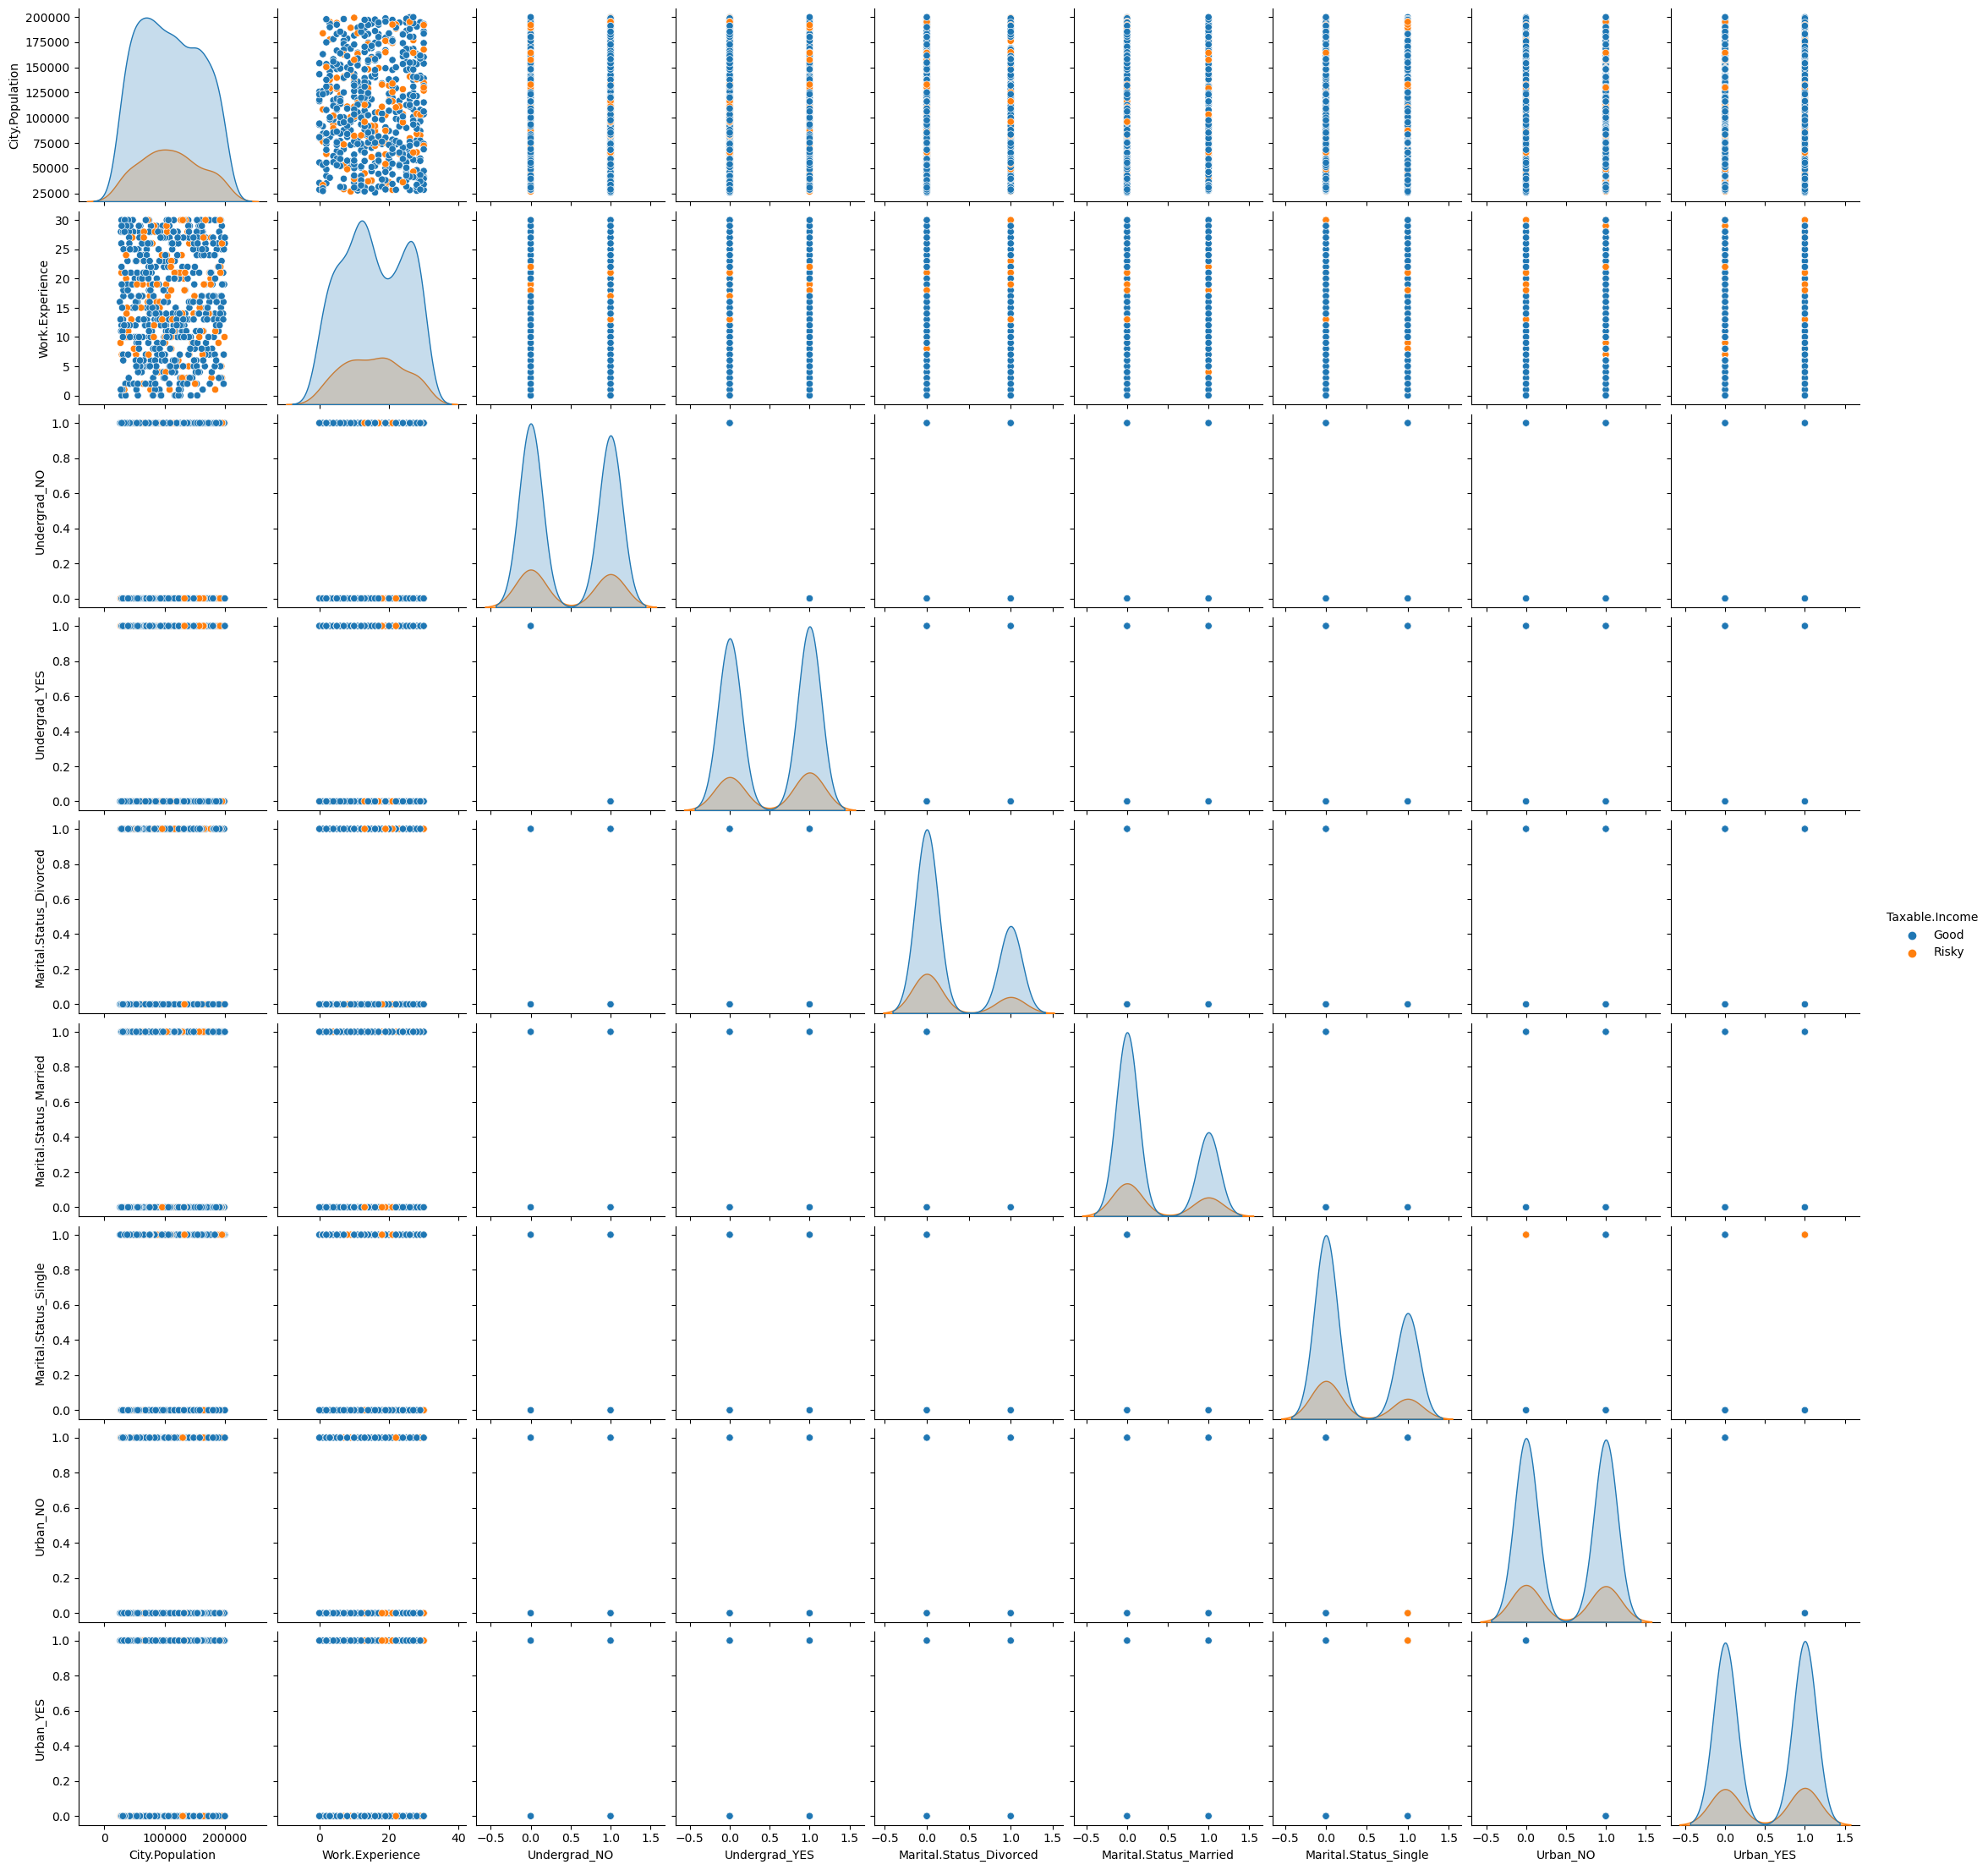

In [9]:
import seaborn as sns
sns.pairplot(data=data, hue = 'Taxable.Income')

### Encoding "Taxable.Income"

In [10]:
data["Taxable.Income"] = data["Taxable.Income"].astype('category')
data["Taxable.Income"] = data["Taxable.Income"].cat.codes

In [11]:
data

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,0,50047,10,1,0,0,0,1,0,1
1,0,134075,18,0,1,1,0,0,0,1
2,0,160205,30,1,0,0,1,0,0,1
3,0,193264,15,0,1,0,0,1,0,1
4,0,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,0,39492,7,0,1,1,0,0,0,1
596,0,55369,2,0,1,1,0,0,0,1
597,0,154058,0,1,0,1,0,0,0,1
598,0,180083,17,0,1,0,1,0,1,0


### Normalization function 

In [12]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

df_norm = norm_func(data)
df_norm.tail(10)

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
590,0.0,0.341473,0.466667,1.0,0.0,0.0,1.0,0.0,0.0,1.0
591,1.0,0.615406,0.600000,0.0,1.0,0.0,0.0,1.0,0.0,1.0
592,0.0,0.283703,0.533333,0.0,1.0,0.0,0.0,1.0,1.0,0.0
593,0.0,0.610256,0.333333,1.0,0.0,1.0,0.0,0.0,0.0,1.0
594,0.0,0.412341,0.300000,1.0,0.0,0.0,1.0,0.0,0.0,1.0
595,0.0,0.078811,0.233333,0.0,1.0,1.0,0.0,0.0,0.0,1.0
596,0.0,0.170058,0.066667,0.0,1.0,1.0,0.0,0.0,0.0,1.0
597,0.0,0.737240,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,1.0
598,0.0,0.886810,0.566667,0.0,1.0,0.0,1.0,0.0,1.0,0.0
599,0.0,0.760683,0.533333,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [13]:
X = df_norm.drop(['Taxable.Income'], axis=1)
y = df_norm['Taxable.Income']

### Spliting data into training and testing

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

## - Decision Tree Classifier

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

### Building Decision Tree Classifier using entropy Criteria

In [17]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [18]:
cn=['0', '1']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = X.columns, 
               class_names=cn,
               filled = True);

In [19]:
pred = model.predict(x_train)
pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

In [21]:
sns.heatmap(confusion_matrix(y_train,pred), annot=True,linewidths=1)

<AxesSubplot:>

In [22]:
np.mean(y_train==pred)

0.8020833333333334

80.2 % Accuracy for train_data

In [23]:
y_pred = model.predict(x_test)
y_pred

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

In [24]:
accuracy_score(y_test,y_pred)

0.775

77.5 % Accuracy for test_data

### Building Decision Tree Classifier using gini Criteria

In [25]:
model2 = DecisionTreeClassifier(criterion = 'gini',min_samples_split=5,max_depth=4)
model2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, min_samples_split=5)

In [26]:
cn=['Risky','Good',]
fig, axes = plt.subplots(figsize = (4,4), dpi=1000)
tree.plot_tree(model2,
               feature_names = X.columns, 
               class_names=cn,
               filled = True);

In [27]:
model2.predict(x_train)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [28]:
sns.heatmap(pd.crosstab(y_train,model2.predict(x_train)),annot= True, linewidths=1 )

<AxesSubplot:xlabel='col_0', ylabel='Taxable.Income'>

In [29]:
accuracy_score(y_train,model2.predict(x_train))

0.80625

80.6 % Accuracy for train_data

In [30]:
y_p= model2.predict(x_test)

In [31]:
accuracy_score(y_test,y_p)

0.7666666666666667

76.6 % Accuracy for test_data

### And aslo done Hyperparameter Tunning for Decision tree classifier to know the best Parameter 

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, x_train, y_train, x_test, y_test, train=True):
    if train:
        pred = clf.predict(x_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(x_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}


tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(x_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(x_train, y_train)
print_score(tree_clf, x_train, y_train, x_test, y_test, train=True)
print_score(tree_clf, x_train, y_train, x_test, y_test, train=False)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits


## -Decision Tree Regression


In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
model3 = DecisionTreeRegressor(max_depth=3)
model3.fit(x_train, y_train)

In [ ]:
#Find the mse
from sklearn import metrics
p=model3.predict(x_test)
metrics.mean_squared_error(y_test,p)

In [ ]:
np.mean(y_test==p)

For Decision Tree Regression model is not performing Good